# Twitter Sentiment Analysis

**The objective of this notebook is follow step by step sentiment analysis on our dataset.**

## Importing libraries

In [58]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy as tw

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import nltk as nlp
from nltk.corpus import stopwords # importing stopwords: to remove those words which does not add much meaning to a sentence.
from wordcloud import WordCloud, STOPWORDS

## Applying Twitter keys

In [2]:
consumer_key= 'N6HU4xPZbpNIYHOTyHhabIMV5'
consumer_secret= '0ccSSVkuSRXa7q36HXiUZ3vdUBgBSZzDciFb4sfbawDNZMDVOk'
access_token= '1336540570370461697-QJ6UWTDrYUy232vl9svVNdN3Un3O9f'
access_token_secret= 'iobLpBkdMgvxfq1gdfpE8OxLkhnA2ER5ePWDazCGR0TWY'

## Twitter Authorisation and Authentication for API

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Importing CSV file

In [4]:
dummy = pd.read_csv('complete_data.csv')

In [5]:
dummy.head()

,created at,tweets
0,2020-12-31 14:12:43,b'Like Amazon don\xe2\x80\x99t be playing with...
1,2020-12-31 14:12:37,b'I just listed: Free People Sweet Emotion Emb...
2,2020-12-31 14:12:37,b'Wow. This is just very very Amazing news tha...
3,2020-12-31 14:12:36,"b'@momsfourthchild @LettersOfNote Well, Amazon..."
4,2020-12-31 14:12:36,b'This goes for Etsy or Amazon books..\n\nCrea...


In [6]:
dummy.columns

Index(['created at', 'tweets'], dtype='object')

In [7]:
df = pd.DataFrame(data=dummy)
df_product = df.copy(deep=True)
df.head()

,created at,tweets
0,2020-12-31 14:12:43,b'Like Amazon don\xe2\x80\x99t be playing with...
1,2020-12-31 14:12:37,b'I just listed: Free People Sweet Emotion Emb...
2,2020-12-31 14:12:37,b'Wow. This is just very very Amazing news tha...
3,2020-12-31 14:12:36,"b'@momsfourthchild @LettersOfNote Well, Amazon..."
4,2020-12-31 14:12:36,b'This goes for Etsy or Amazon books..\n\nCrea...


## Renaming column name

In [8]:
df.rename(columns = {'tweets':'Tweet'}, inplace = True) 
df.head()

,created at,Tweet
0,2020-12-31 14:12:43,b'Like Amazon don\xe2\x80\x99t be playing with...
1,2020-12-31 14:12:37,b'I just listed: Free People Sweet Emotion Emb...
2,2020-12-31 14:12:37,b'Wow. This is just very very Amazing news tha...
3,2020-12-31 14:12:36,"b'@momsfourthchild @LettersOfNote Well, Amazon..."
4,2020-12-31 14:12:36,b'This goes for Etsy or Amazon books..\n\nCrea...


In [9]:
df.shape

(10800, 2)

## Data Cleaning

In [10]:
# remove URLs, and twitter handles

for i in range(len(df['Tweet'])):
    df['Tweet'][i] = " ".join([word for word in df['Tweet'][i].split()
                              if 'http' not in word and '@' not in word and '<' not in word])

# remove special characters and convert to lowercase
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('[!@#$:).;,?&-]https?:\/\/A-Za-z0-9\.\/RT]', '', x.lower()))
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('  ', ' ', x))

In [11]:
# some more cleaning tweets
def cleanTxt1(text):
    text = re.sub(r'[^A-za-z0-9 ]+','',text) #
    text = re.sub(r'#','',text)  #removing # symbol
    text = re.sub(r'rt[\s]+','',text) #removing RT
    text = re.sub(r'https?:\/\/\S+','',text) #removing the hyperlink
    text = re.sub(r'[@]+','',text)
    text = re.sub(r'b+','',text)
    text = re.sub(r'xe2\\x80\\xa6\\+','',text)
    text = re.sub(r'xf0*','',text)
    text = re.sub(r'xa6*','',text)
    text = re.sub(r'xe2*','',text)
    text = re.sub(r'xc2*','',text)  
    text = re.sub(r'x9f*','',text)
    text = re.sub(r'x93*','',text)
    text = re.sub(r'xa2*','',text)
    text = re.sub(r'x80*','',text)
    return text  
df['Tweet']=df['Tweet'].apply(cleanTxt1)  # applying to 'Tweet' feature

In [12]:
# removing emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['Tweet']=df['Tweet'].apply(deEmojify)  

In [13]:
df.head()

,created at,Tweet
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people pac...
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroid...
2,2020-12-31 14:12:37,wow this is just very very amazing news that j...
3,2020-12-31 14:12:36,well amazon prime next day delivery
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate fo...


In [14]:
#df = pd.DataFrame(data=data)
pd.set_option('display.max_colwidth', 80)

In [15]:
df.head()

,created at,Tweet
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...
3,2020-12-31 14:12:36,well amazon prime next day delivery
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...


## Applying Lemmatization on Tweet feature

In [16]:
lem = nlp.WordNetLemmatizer()
def lemmatize(text_lem):
    text = lem.lemmatize(text_lem) 

    return text_lem  
df['Tweet']=df['Tweet'].apply(lemmatize) 

In [17]:
df.head()

,created at,Tweet
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...
3,2020-12-31 14:12:36,well amazon prime next day delivery
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...


## Creating a list of Stopwords

In [18]:
stopwords = set(STOPWORDS) # pre-defined words to ignore
# adding extra words to ignore: 
# many tweets contain RT in the text, and we know the tweets are about flikart, amazon, snapdeal
stopwords.update(['rt','cancel','amazon', 'flipkart', 'snapdeal','twitter','fraud',
                  'company','cheat','ut','uy','please','thank','received',
                 'wrong','cheats','thing','frauds','product','hi','celerity','now','looting',
                 'customer','selling','us','amp','thanks','customers','order','will','hand']) 

In [19]:
df.head()

,created at,Tweet
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...
3,2020-12-31 14:12:36,well amazon prime next day delivery
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...


## Tokenisation, applying Stopwords and making WordCloud

In [20]:
text = ' '.join(txt for txt in df.Tweet)
wordcloud = (WordCloud(background_color="white", # easier to read
                      max_words=50,
                       collocations=False,# let's no polute it too much
                      stopwords=stopwords) # define words to ignore
                      .generate(text)) # generate the wordcloud with text

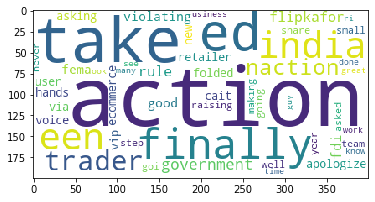

In [21]:
plt.imshow(wordcloud)
plt.show()
#plt.axis('off')

## Applying Subjectivity and Polarity to tweets

In [22]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [23]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity) # creating new feature 'Subjectivity'
df['Polarity'] = df['Tweet'].apply(getTextPolarity) # creating new feature 'Polarity'

In [24]:
df.head(50)

,created at,Tweet,Subjectivity,Polarity
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...,0.400000,-0.100000
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...,0.725000,0.375000
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...,1.000000,0.440000
3,2020-12-31 14:12:36,well amazon prime next day delivery,0.000000,0.000000
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...,0.000000,0.000000
5,2020-12-31 14:12:33,3 pack of armor all 1299 \n [ visit smartcooldealscom ],0.000000,0.000000
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364
7,2020-12-31 14:12:32,according to everyone who knows him the councillor had no enemies ut someone...,0.383333,0.100000
8,2020-12-31 14:12:32,amazon acquires podcast startup wondery,0.000000,0.000000
9,2020-12-31 14:12:30,hello thanks for ringing this situation to our attention wed like to have th...,0.200000,0.200000


## Removing empty tweets if any

In [25]:
df = df.drop(df[df['Tweet'] == ''].index)
df.head(50)

,created at,Tweet,Subjectivity,Polarity
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...,0.400000,-0.100000
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...,0.725000,0.375000
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...,1.000000,0.440000
3,2020-12-31 14:12:36,well amazon prime next day delivery,0.000000,0.000000
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...,0.000000,0.000000
5,2020-12-31 14:12:33,3 pack of armor all 1299 \n [ visit smartcooldealscom ],0.000000,0.000000
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364
7,2020-12-31 14:12:32,according to everyone who knows him the councillor had no enemies ut someone...,0.383333,0.100000
8,2020-12-31 14:12:32,amazon acquires podcast startup wondery,0.000000,0.000000
9,2020-12-31 14:12:30,hello thanks for ringing this situation to our attention wed like to have th...,0.200000,0.200000


## Classifying which type of sentiment each tweet is: positive, negative or neutral

In [26]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [27]:
# making a new column 'Score' to classify which type of sentiment it is.
df['Score'] = df['Polarity'].apply(getTextAnalysis)
df.head(50)

,created at,Tweet,Subjectivity,Polarity,Score
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...,0.400000,-0.100000,Negative
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...,0.725000,0.375000,Positive
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...,1.000000,0.440000,Positive
3,2020-12-31 14:12:36,well amazon prime next day delivery,0.000000,0.000000,Neutral
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...,0.000000,0.000000,Neutral
5,2020-12-31 14:12:33,3 pack of armor all 1299 \n [ visit smartcooldealscom ],0.000000,0.000000,Neutral
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364,Positive
7,2020-12-31 14:12:32,according to everyone who knows him the councillor had no enemies ut someone...,0.383333,0.100000,Positive
8,2020-12-31 14:12:32,amazon acquires podcast startup wondery,0.000000,0.000000,Neutral
9,2020-12-31 14:12:30,hello thanks for ringing this situation to our attention wed like to have th...,0.200000,0.200000,Positive


## Calculating percentage of each class of Score feature

In [28]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

negative = df[df['Score'] == 'Negative']

print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative tweets")

neutral = df[df['Score'] == 'Neutral']

print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral tweets")

37.99440298507463 % of positive tweets
16.62313432835821 % of negative tweets
45.382462686567166 % of neutral tweets


In [65]:
37.99 + 16.62 + 45.38

99.99000000000001

**From above we come to know that from total tweets there are nearly 38% of positive tweets, 16.62% of negative tweets and 45.38% are neutral tweets.** 

### Percentage wise plot 

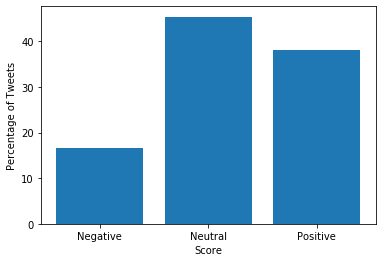

In [66]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values
# print(values)
values = values*100/sum(values)
plt.xlabel('Score')
plt.ylabel('Percentage of Tweets')
#set_major_formatter(mtick.PercentFormatter())
plt.bar(labels, values);

**From above we can see majority of tweets are of neutral class and minority tweets are from negative class.**

## Analyse for which products what are the sentiments.

In [30]:
df_product.head()

,created at,tweets
0,2020-12-31 14:12:43,b'Like Amazon don\xe2\x80\x99t be playing with people packages too talkin bo...
1,2020-12-31 14:12:37,"b'I just listed: Free People Sweet Emotion Embroidered Blouse, Size X-Small ..."
2,2020-12-31 14:12:37,b'Wow. This is just very very Amazing news that @PiyushGoyal ji took\nAction...
3,2020-12-31 14:12:36,"b'@momsfourthchild @LettersOfNote Well, Amazon prime next day delivery.'"
4,2020-12-31 14:12:36,"b'This goes for Etsy or Amazon books..\n\nCreate for holidays and trends, bu..."


### Again cleaning data and converting tweets to lower case.

In [31]:
# remove special characters(except hash'#') and convert to lowercase
df_product['tweets'] = df_product['tweets'].apply(lambda x: re.sub('[!@$:).;,?&-]https?:\/\/A-Za-z0-9\.\/RT]', '', x.lower()))
df_product['tweets'] = df_product['tweets'].apply(lambda x: re.sub('  ', ' ', x))

In [32]:
df_product.head()

,created at,tweets
0,2020-12-31 14:12:43,b'like amazon don\xe2\x80\x99t be playing with people packages too talkin bo...
1,2020-12-31 14:12:37,"b'i just listed: free people sweet emotion embroidered blouse, size x-small ..."
2,2020-12-31 14:12:37,b'wow. this is just very very amazing news that @piyushgoyal ji took\naction...
3,2020-12-31 14:12:36,"b'@momsfourthchild @lettersofnote well, amazon prime next day delivery.'"
4,2020-12-31 14:12:36,"b'this goes for etsy or amazon books..\n\ncreate for holidays and trends, bu..."


### Removing patterns, repeated words and keeping only '#' text

In [33]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [34]:
def find_product(input_txt, pattern):
    input_txt=remove_pattern(input_txt, "amazon[\w]*")
    input_txt=remove_pattern(input_txt, "flipkart[\w]*")
    input_txt=remove_pattern(input_txt, "snapdeal[\w]*")
    input_txt=remove_pattern(input_txt, "fakereviews[\w]*")
    input_txt=remove_pattern(input_txt, "dontuse[\w]*")
    input_txt=remove_pattern(input_txt, "cheats[\w]*")
    input_txt=remove_pattern(input_txt, "ro[\w]*")
    input_txt=remove_pattern(input_txt, "quiz[\w]*")
    input_txt=remove_pattern(input_txt, "love[\w]*")
    input_txt=remove_pattern(input_txt, "deal[\w]*")
    input_txt=remove_pattern(input_txt, "inside[\w]*")
    input_txt=remove_pattern(input_txt, "boycot[\w]*")
    input_txt=remove_pattern(input_txt, "fake[\w]*")
    input_txt=remove_pattern(input_txt, "shit[\w]*")

    r = re.findall(pattern, input_txt)
    for i in r:
        
        input_txt = i
        print(i)
        return (i)
    return "#"  

### Making list of all product which are mentioned in '#' of tweets

In [35]:
product_list = []
df_product['product']='#'
for i in df_product['tweets']:
    product = find_product(i, "#[\w]*")
    product_list.append(product)

#nowplaying
#tapn
#eseibio
#happynewyear2021
#dystopian
#asmsg
#quote
#asmsg
#hanbin
#ku
#bitcoin
#
#reze
#publi
#onair
#backg
#compassion
#mentalhealth
#happynewyear2021
#
#s
#bluetooth
#loot
#disney
#coupon
#ee
#nowplaying
#
#retribution
#social
#thelucylawrencemysteries
#writingcommunity
#
#thriller
#happynewyear2021
#gospelradiop
#giveaway
#yourewelcome
#ps5stockuk
#nowplaying
#nowplaying
#spotify
#nowplaying
#free
#veganuary
#nook
#paranormal
#bye2020
#davidperlmutter
#6
#99cents
#cblyall
#musicbiz
#calendar
#notebook
#teenreads
#
#newyear2021
#mi
#coupon
#gay
#affiliatemarketing
#business
#fullblastradio
#hikingadventures
#survived2020
#happynewyear2021
#affiliate
#stephenking
#manipulation_by_
#north
#bigtimeradio
#earnmoney
#happynewyear2021
#coupon
#nowplaying
#tapn
#eseibio
#happynewyear2021
#dystopian
#asmsg
#quote
#asmsg
#hanbin
#ku
#bitcoin
#
#reze
#publi
#onair
#backg
#compassion
#mentalhealth
#happynewyear2021
#
#s
#bluetooth
#loot
#disney
#coupon
#ee
#nowplaying
#
#retr

#students
#
#covid
#
#2021livinginhope
#fitness
#fraud
#
#
#
#business
#2021livinginhope
#
#scam2020
#revenue
#
#
#greenbrrew
#backg
#monday
#digitalmarketing
#isrgrajan
#
#stockmarket
#shopf
#news
#
#spamalert
#payu
#
#
#shopf
#saturdayday
#book
#students
#students
#students
#
#covid
#
#2021livinginhope
#fitness
#fraud
#
#
#
#business
#2021livinginhope
#
#scam2020
#revenue
#
#
#greenbrrew
#backg
#monday
#digitalmarketing
#isrgrajan
#
#stockmarket
#shopf
#news
#
#spamalert
#payu
#
#
#shopf
#saturdayday


In [36]:
# printing product list
product_list

['#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#nowplaying',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#tapn',
 '#eseibio',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#happynewyear2021',
 '#',
 '#dystopian',
 '#',
 '#',
 '#',
 '#asmsg',
 '#',
 '#',
 '#quote',
 '#',
 '#asmsg',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#hanbin',
 '#ku',
 '#',
 '#',
 '#',
 '#bitcoin',
 '#',
 '#',
 '#reze',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#publi',
 '#',
 '#',
 '#',
 '#',
 '#onair',
 '#backg',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#compassion',
 '#mentalhealth',
 '#',
 '#',
 '#happynewyear2021',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#s',
 '#bluetooth',
 '#',
 '#',
 '#',
 '#loot',
 '#',
 '#',
 '#disney',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#coupon',
 '#ee',
 '#',
 '#nowplaying',
 '#',
 '#',
 '#',
 '#',
 '#retribution',
 '#',
 '#social',
 '

### Converting it into dataframe as a new feature called 'Product'.

In [37]:
df_product = pd.DataFrame(data=product_list,columns=['product'])

In [38]:
df_product.head(50)

,product
0,#
1,#
2,#
3,#
4,#
5,#
6,#nowplaying
7,#
8,#
9,#


### Concatenating previous dataframe and product dataframe(created above) 

In [39]:
df_product_sentiment = pd.concat([df,df_product],axis=1)

In [40]:
# printing first 50 tweets to see the final dataframe
df_product_sentiment.head(50)

,created at,Tweet,Subjectivity,Polarity,Score,product
0,2020-12-31 14:12:43,like amazon don\\\9t e playing with people packages too talkin out two day d...,0.400000,-0.100000,Negative,#
1,2020-12-31 14:12:37,i just listed free people sweet emotion emroidered louse size xsmall purple...,0.725000,0.375000,Positive,#
2,2020-12-31 14:12:37,wow this is just very very amazing news that ji took\naction against amazon ...,1.000000,0.440000,Positive,#
3,2020-12-31 14:12:36,well amazon prime next day delivery,0.000000,0.000000,Neutral,#
4,2020-12-31 14:12:36,this goes for etsy or amazon ooks\n\ncreate for holidays and trends ut don\\...,0.000000,0.000000,Neutral,#
5,2020-12-31 14:12:33,3 pack of armor all 1299 \n [ visit smartcooldealscom ],0.000000,0.000000,Neutral,#
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364,Positive,#nowplaying
7,2020-12-31 14:12:32,according to everyone who knows him the councillor had no enemies ut someone...,0.383333,0.100000,Positive,#
8,2020-12-31 14:12:32,amazon acquires podcast startup wondery,0.000000,0.000000,Neutral,#
9,2020-12-31 14:12:30,hello thanks for ringing this situation to our attention wed like to have th...,0.200000,0.200000,Positive,#


### Removing only '#' from Product feature and keeping rest of text

In [41]:
df_product_sentiment = df_product_sentiment[df_product_sentiment['product']!= '#']

In [42]:
df_product_sentiment.head()

,created at,Tweet,Subjectivity,Polarity,Score,product
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364,Positive,#nowplaying
16,2020-12-31 14:12:26,tapn with us on the air now \\\4\5\\\4\5 click here to listen we just playe...,0.400000,-0.300000,Negative,#tapn
17,2020-12-31 14:12:25,500 review\n\neseiio hiphop music fashion revolution twitter faceook amazon ...,0.000000,0.000000,Neutral,#eseibio
23,2020-12-31 14:12:21,happynewyear2021 free on kindleunlimited leo katz is a fraud with a dark sec...,0.633333,-0.050000,Negative,#happynewyear2021
25,2020-12-31 14:12:20,you know youve read a good ook when you close the ook and sigh \n\nnovus y c...,0.600000,0.700000,Positive,#dystopian


### Replacing the '#' with empty quotes. Not including any spaces 

In [43]:
df_product_sentiment['product'] = df_product_sentiment['product'].apply(lambda x: re.sub('#', '', x))

In [44]:
df_product_sentiment.head()

,created at,Tweet,Subjectivity,Polarity,Score,product
6,2020-12-31 14:12:33,nowplaying exxxoticc money talks listen live on stream our new release of ...,0.477273,0.136364,Positive,nowplaying
16,2020-12-31 14:12:26,tapn with us on the air now \\\4\5\\\4\5 click here to listen we just playe...,0.400000,-0.300000,Negative,tapn
17,2020-12-31 14:12:25,500 review\n\neseiio hiphop music fashion revolution twitter faceook amazon ...,0.000000,0.000000,Neutral,eseibio
23,2020-12-31 14:12:21,happynewyear2021 free on kindleunlimited leo katz is a fraud with a dark sec...,0.633333,-0.050000,Negative,happynewyear2021
25,2020-12-31 14:12:20,you know youve read a good ook when you close the ook and sigh \n\nnovus y c...,0.600000,0.700000,Positive,dystopian


### Counting 'Score' from 'Product' feature for all tweets

In [45]:
product_plot = df_product_sentiment.groupby('product')['Score'].value_counts()

In [46]:
print(product_plot)

product                Score   
1                      Neutral      2
                       Positive     2
2                      Neutral      2
2021livinginhope       Neutral     18
6                      Neutral      7
                                   ..
writingcommunity       Neutral      3
yahoofinance           Neutral      2
yea                    Neutral      2
youattractwhatyoufear  Neutral      2
yourewelcome           Negative     7
Name: Score, Length: 156, dtype: int64


### Exporting to a CSV file. 

In [47]:
product_plot = df_product_sentiment.to_csv('product_plot.csv',index=False)